In [163]:
import pandas as pd
import json
import numpy as np

In [164]:
datasets = [
        '20newsgroups',
        'avila',
        'banknote',
        'cancerwisconsin',
        'car',
        'cargo',
        'credit',
        'crowd',
        'diabetes',
        'digits',
        'frog-family',
        'frog-genus',
        'frog-species',
        'hcv',
        'htru',
        'ionosfera',
        'iranian',
        'iris',
        'mice',
        'mushroom',
        'obesity',
        'occupancy',
        'pen',
        'qualitywine',
        'robot',
        'sensorless',
        'shill',
        'sonar',
        'taiwan',
        'thyroid',
        'vowel',
        'wifi',
        'wine',
        'data0',
        'data5',
        'data10',
        'data25',
        'data50',
        'myocardial',
        'micromass' 
    ]

models = ['Normal_AdaBoost', 'Normal_GradientBoosting', 'Normal_XGBoost',
         'Normal_ExtraTrees', 'Approval_ExtraTrees', 'Plurality_ExtraTrees',
         'Borda_ExtraTrees','Copeland_ExtraTrees','Poss_ExtraTrees',
         'PossProd_ExtraTrees','Threeway_ExtraTrees',
         'Normal_RandomForest', 'Approval_RandomForest', 'Plurality_RandomForest',
         'Borda_RandomForest','Copeland_RandomForest','Poss_RandomForest',
         'PossProd_RandomForest','Threeway_RandomForest',
         'SPA_DecisionTree','SPA_ExtraTree']

shortened_names = ["AB", "GB", "XGB", "Normal_ET", "Approval_ET", "Plurality_ET",
                  "Borda_ET", "Copeland_ET", "Poss_ET", "PossProd_ET", "Threeway_ET",
                  "Normal_RF", "Approval_RF", "Plurality_RF", "Borda_RF", "Copeland_RF",
                  "Poss_RF", "PossProd_RF", "Threeway_RF", "SPA_DT", "SPA_ET"]

names_dict = dict(zip(models, shortened_names))

files = ['./Results/JSON/' + name + '.json' for name in datasets]

attributes = ["Classi","Features","OriginalRows"]

metrics = ['balacc','acc','microf1','macrof1','time']
metric_dict = {'balacc': 'Balanced Accuracy',
              'acc': 'Accuracy',
              'microf1': 'Micro-average F1',
              'macrof1': 'Macro-average F1',
              'time': 'Running Time (ms)'}

names_dict

{'Normal_AdaBoost': 'AB',
 'Normal_GradientBoosting': 'GB',
 'Normal_XGBoost': 'XGB',
 'Normal_ExtraTrees': 'Normal_ET',
 'Approval_ExtraTrees': 'Approval_ET',
 'Plurality_ExtraTrees': 'Plurality_ET',
 'Borda_ExtraTrees': 'Borda_ET',
 'Copeland_ExtraTrees': 'Copeland_ET',
 'Poss_ExtraTrees': 'Poss_ET',
 'PossProd_ExtraTrees': 'PossProd_ET',
 'Threeway_ExtraTrees': 'Threeway_ET',
 'Normal_RandomForest': 'Normal_RF',
 'Approval_RandomForest': 'Approval_RF',
 'Plurality_RandomForest': 'Plurality_RF',
 'Borda_RandomForest': 'Borda_RF',
 'Copeland_RandomForest': 'Copeland_RF',
 'Poss_RandomForest': 'Poss_RF',
 'PossProd_RandomForest': 'PossProd_RF',
 'Threeway_RandomForest': 'Threeway_RF',
 'SPA_DecisionTree': 'SPA_DT',
 'SPA_ExtraTree': 'SPA_ET'}

In [165]:
df_acc = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_time = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_balacc = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_microf1 = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_macrof1 = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)

df_atts = pd.DataFrame(np.zeros((len(datasets), len(attributes))), index=datasets, columns=attributes)

dic = dict(zip(metrics, [df_acc, df_time, df_balacc, df_microf1, df_macrof1]))

In [166]:
for dataset in datasets:
    file = './Results/JSON/' + dataset + '.json'
    with open(file) as f:
      data = json.load(f)
    for model in models:
        for metric in metrics:
            dic[metric].loc[dataset,names_dict[model]] = data[model + metric]
            if data[model + metric] > 1 and metric != 'time':
                print(dataset)
    for attr in attributes:
        df_atts.loc[dataset,attr] = data[attr]
dic['balacc']

,AB,GB,XGB,Normal_ET,Approval_ET,Plurality_ET,Borda_ET,Copeland_ET,Poss_ET,PossProd_ET,...,Normal_RF,Approval_RF,Plurality_RF,Borda_RF,Copeland_RF,Poss_RF,PossProd_RF,Threeway_RF,SPA_DT,SPA_ET
20newsgroups,0.527436,0.545250,0.606598,0.774189,0.747676,0.775071,0.775071,0.775071,0.775071,0.754359,...,0.731979,0.757696,0.770984,0.760925,0.768346,0.747748,0.759831,0.769517,0.648954,0.635603
avila,0.885877,0.970059,0.990151,0.985271,0.985271,0.985271,0.942928,0.944847,0.985271,0.941807,...,0.987132,0.987132,0.987132,0.965101,0.971006,0.987132,0.914318,0.987132,0.989342,0.930776
banknote,0.996393,0.985896,0.992449,0.998688,0.998688,0.998688,0.998688,0.998688,0.998688,0.916395,...,0.990650,0.990650,0.990650,0.990650,0.990650,0.990650,0.909859,0.990650,0.985244,0.999344
cancerwisconsin,0.965431,0.930502,0.958251,0.964474,0.964474,0.964474,0.964474,0.964474,0.964474,0.925607,...,0.970582,0.970582,0.970582,0.970582,0.970582,0.970582,0.904694,0.970582,0.964057,0.964253
car,0.730739,0.751535,0.669549,0.770084,0.770084,0.770084,0.743818,0.723410,0.770084,0.750000,...,0.680128,0.680128,0.680128,0.625895,0.578276,0.680128,0.250000,0.680128,0.707181,0.706963
cargo,0.420923,0.537160,0.560874,0.551274,0.551274,0.551274,0.550379,0.535474,0.551274,0.535485,...,0.530585,0.530585,0.530585,0.530301,0.528063,0.530585,0.333333,0.530585,0.528165,0.522653
credit,0.640709,0.602620,0.658092,0.621211,0.621211,0.621211,0.621211,0.621211,0.621211,0.600000,...,0.610490,0.610490,0.610490,0.610490,0.610490,0.610490,0.600000,0.610490,0.613824,0.592916
crowd,0.524992,0.691388,0.759811,0.745144,0.745144,0.745144,0.720024,0.703645,0.745144,0.189532,...,0.720265,0.720265,0.720265,0.709229,0.689264,0.720265,0.200699,0.720265,0.715439,0.706456
diabetes,0.697330,0.691612,0.716600,0.717943,0.717943,0.717943,0.717943,0.717943,0.717943,0.750000,...,0.725443,0.725443,0.725443,0.725443,0.725443,0.725443,0.750000,0.725443,0.697926,0.681115
digits,0.825701,0.881534,0.969545,0.980949,0.980949,0.980949,0.949853,0.921644,0.980949,0.975674,...,0.977024,0.977024,0.977024,0.942717,0.903664,0.977024,0.928653,0.977024,0.962089,0.965695


In [167]:
average_df = pd.DataFrame(np.zeros((len(models), len(metrics))), index=shortened_names, columns=metrics)

for metric in metrics:
    average_df.loc[:,metric] = dic[metric].mean()
average_df

,balacc,acc,microf1,macrof1,time
AB,0.711271,0.769124,0.769124,0.709380,9.206482
GB,0.746498,0.813858,0.813858,0.753295,725.848937
XGB,0.793869,0.859352,0.859352,0.800940,476.971009
Normal_ET,0.793270,0.859986,0.859986,0.798470,3.659941
Approval_ET,0.792366,0.859225,0.859225,0.797654,4.433284
Plurality_ET,0.793733,0.859780,0.859780,0.798333,4.000493
Borda_ET,0.751009,0.825733,0.825733,0.752437,6.351451
Copeland_ET,0.743682,0.819685,0.819685,0.744772,34.847662
Poss_ET,0.793733,0.859780,0.859780,0.798333,8.524805
PossProd_ET,0.764816,0.828642,0.827595,0.758455,8.867120


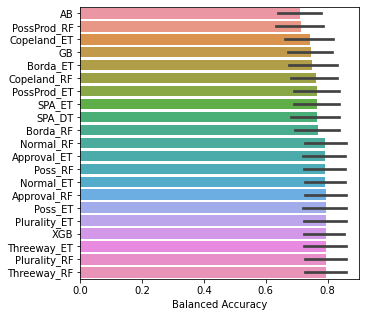

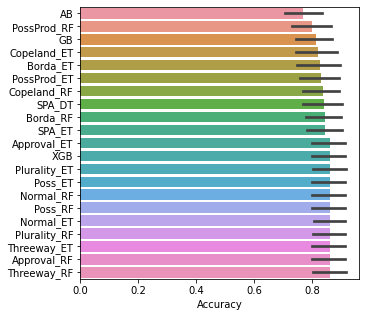

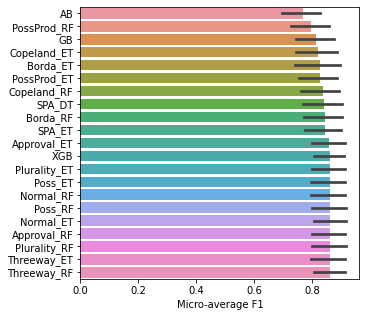

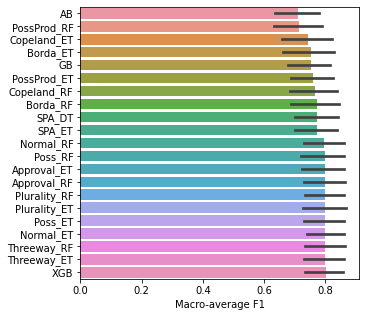

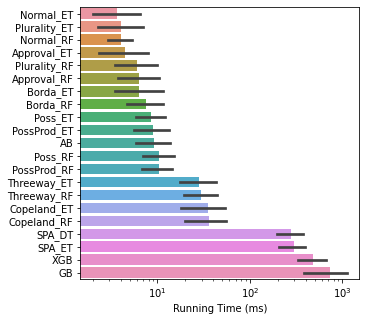

In [168]:
import seaborn

for metric in metrics:
    plt.figure(figsize=(5,5))
    if metric != 'time':
        seaborn.barplot(data=pd.DataFrame(dic[metric],
                                 index=dic[metric].index, columns = dic[metric].columns),
                       orient='h',
                       order=list(average_df.sort_values(metric).index))
    else:
        seaborn.barplot(data=pd.DataFrame(dic[metric],
                                 index=dic[metric].index, columns = dic[metric].columns),
                       orient='h',
                       order=list(average_df.sort_values(metric).index))
        plt.xscale('log')
    plt.xlabel(metric_dict[metric])
    plt.savefig('./Figures/vals_' + metric + ".png", dpi=300, bbox_inches='tight')

In [169]:
from scipy.stats import rankdata

ranks_df = pd.DataFrame(np.zeros((len(models), len(metrics))), index=shortened_names, columns=metrics)

for metric in metrics:
    m = -1
    if metric == 'time':
        m = 1
    ranks = pd.DataFrame(rankdata(m*dic[metric], axis=1),
                         index=dic[metric].index, columns = dic[metric].columns)
    ranks_df.loc[:, metric] = ranks.mean()
ranks_df

,balacc,acc,microf1,macrof1,time
AB,14.5375,17.1000,17.0500,15.0625,9.9500
GB,15.0250,17.2000,17.1500,15.8750,18.2500
XGB,8.8875,9.2375,9.1875,9.7125,19.5000
Normal_ET,7.8500,7.3750,7.3000,7.3000,2.0500
Approval_ET,8.1375,7.9875,7.9375,7.7375,3.3750
Plurality_ET,7.5750,7.5000,7.4250,7.2750,2.7500
Borda_ET,11.5375,11.1750,11.0750,11.4000,6.7000
Copeland_ET,13.3875,12.9000,12.8000,13.4250,12.6625
Poss_ET,7.5750,7.5000,7.4250,7.2750,10.3000
PossProd_ET,12.2750,12.3250,13.0000,13.6125,10.4000


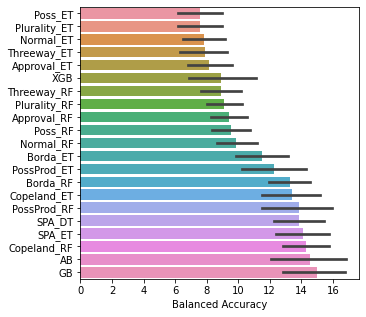

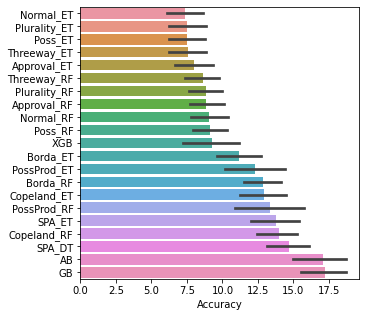

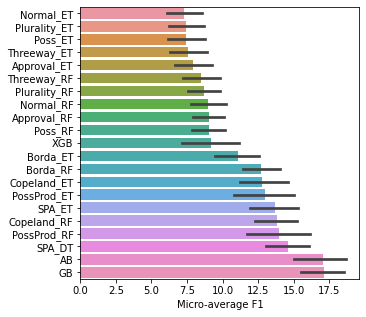

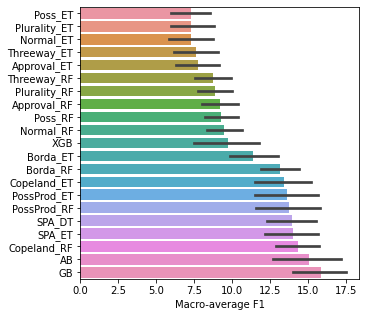

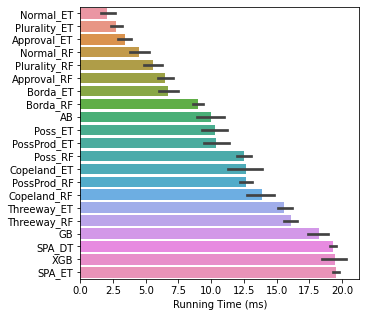

In [170]:
import seaborn

for metric in metrics:
    plt.figure(figsize=(5,5))
    m = -1
    if metric == 'time':
        m = 1
    seaborn.barplot(data=pd.DataFrame(rankdata(m*dic[metric], axis=1),
                             index=dic[metric].index, columns = dic[metric].columns),
                   orient='h',
                   order=list(ranks_df.sort_values(metric).index))
    plt.xlabel(metric_dict[metric])
    plt.savefig('./Figures/ranks_' + metric + ".png", dpi=300, bbox_inches='tight')

In [171]:
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman

friedman_pvals = {}
dic_posthoc_pvals = {}

for metric in metrics:
    _, pvalue = friedmanchisquare(*(dic[metric].values[i, :] for i in range(dic[metric].shape[0])))
    friedman_pvals[metric] = pvalue
    pvalues = posthoc_nemenyi_friedman(dic[metric])
    dic_posthoc_pvals[metric] = pvalues

dic_posthoc_pvals[metric]

,AB,GB,XGB,Normal_ET,Approval_ET,Plurality_ET,Borda_ET,Copeland_ET,Poss_ET,PossProd_ET,...,Normal_RF,Approval_RF,Plurality_RF,Borda_RF,Copeland_RF,Poss_RF,PossProd_RF,Threeway_RF,SPA_DT,SPA_ET
AB,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,0.695619,0.900000,0.900000,0.900000,...,0.013070,0.582206,0.162538,0.900000,0.358147,0.900000,0.900000,0.001879,0.001000,0.001000
GB,0.001000,1.000000,0.900000,0.001000,0.001000,0.001000,0.001000,0.009534,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.170479,0.005531,0.009874,0.900000,0.900000,0.900000
XGB,0.001000,0.900000,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.008567,0.001000,0.001000,0.612051,0.900000,0.900000
Normal_ET,0.001000,0.001000,0.001000,1.000000,0.900000,0.900000,0.098274,0.001000,0.001000,0.001000,...,0.900000,0.158646,0.576239,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
Approval_ET,0.001000,0.001000,0.001000,0.900000,1.000000,0.900000,0.659803,0.001000,0.001000,0.001000,...,0.900000,0.773217,0.900000,0.009202,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
Plurality_ET,0.001000,0.001000,0.001000,0.900000,0.900000,1.000000,0.344779,0.001000,0.001000,0.001000,...,0.900000,0.473752,0.900000,0.001362,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
Borda_ET,0.695619,0.001000,0.001000,0.098274,0.659803,0.344779,1.000000,0.003132,0.528484,0.480109,...,0.900000,0.900000,0.900000,0.900000,0.001000,0.005531,0.003012,0.001000,0.001000,0.001000
Copeland_ET,0.900000,0.009534,0.001000,0.001000,0.001000,0.001000,0.003132,1.000000,0.900000,0.900000,...,0.001000,0.001477,0.001000,0.486374,0.900000,0.900000,0.900000,0.618020,0.001000,0.001000
Poss_ET,0.900000,0.001000,0.001000,0.001000,0.001000,0.001000,0.528484,0.900000,1.000000,0.900000,...,0.004762,0.406371,0.080002,0.900000,0.540424,0.900000,0.900000,0.005531,0.001000,0.001000
PossProd_ET,0.900000,0.001000,0.001000,0.001000,0.001000,0.001000,0.480109,0.900000,0.900000,1.000000,...,0.003513,0.351427,0.063761,0.900000,0.588174,0.900000,0.900000,0.007418,0.001000,0.001000


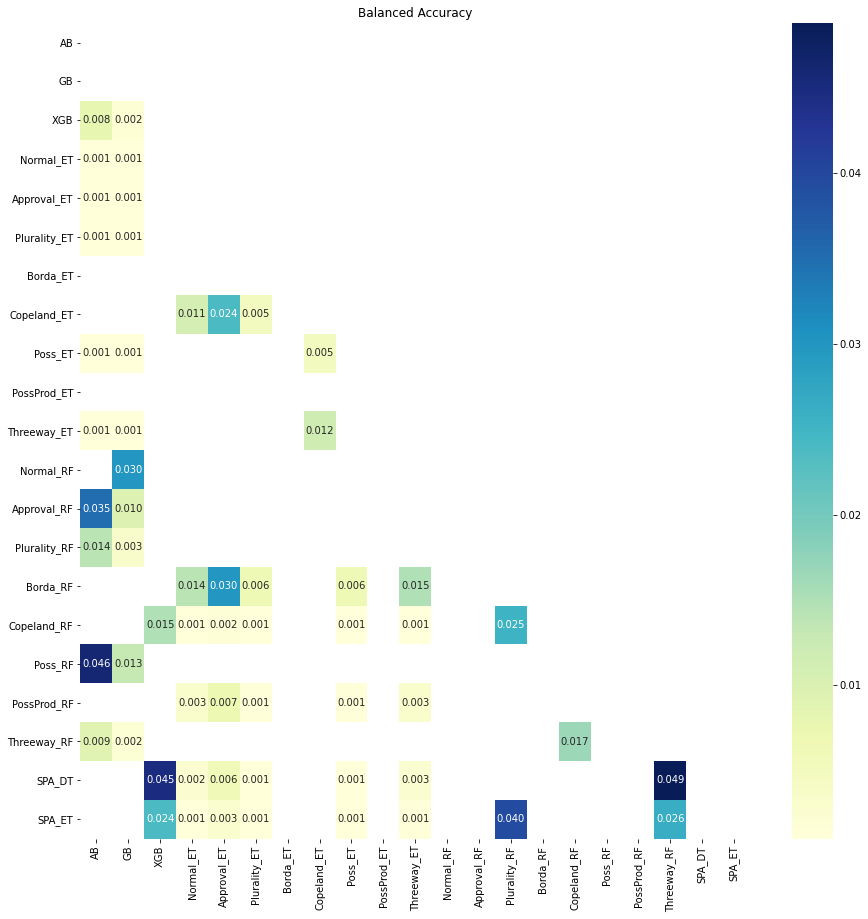

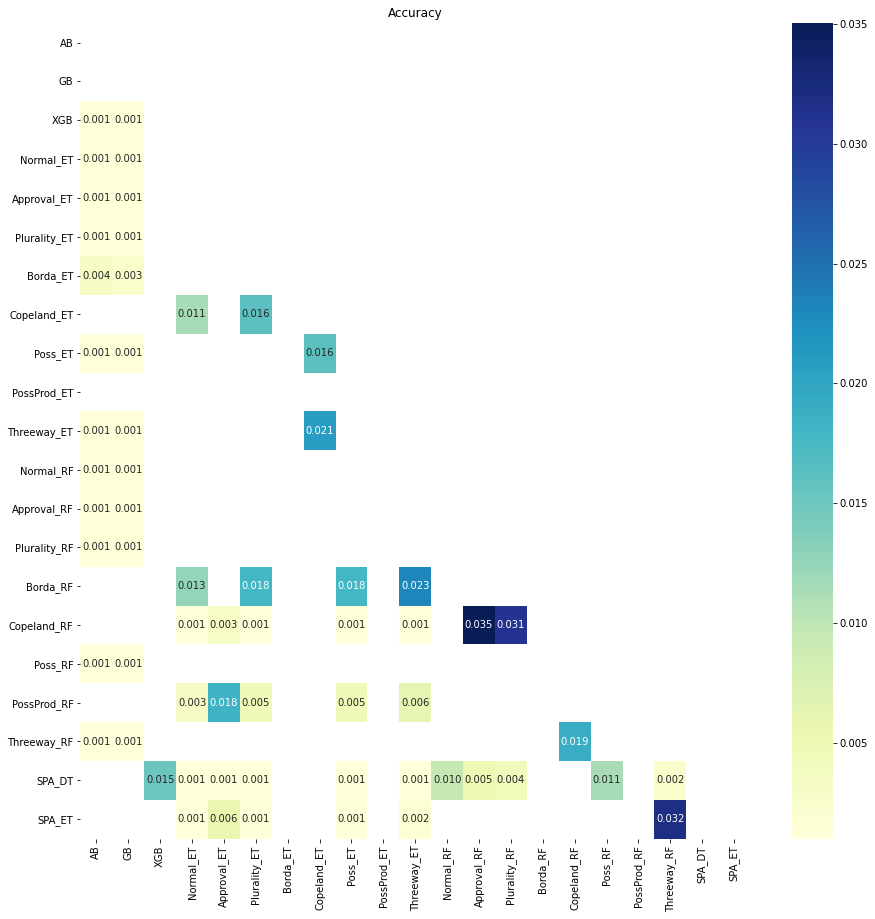

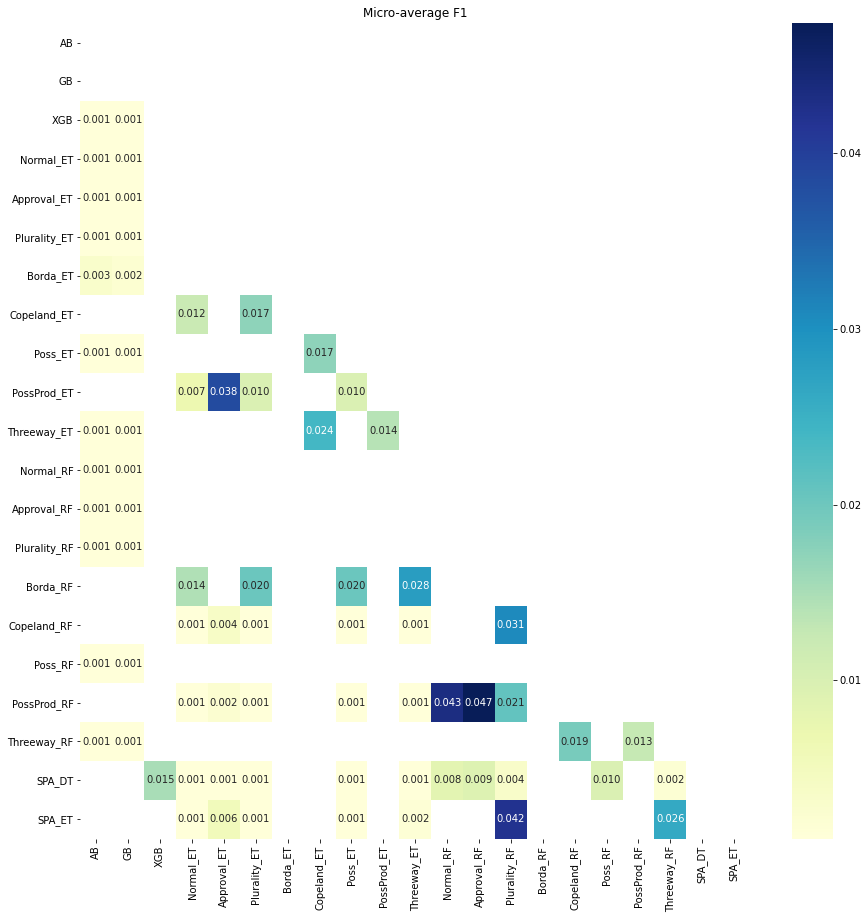

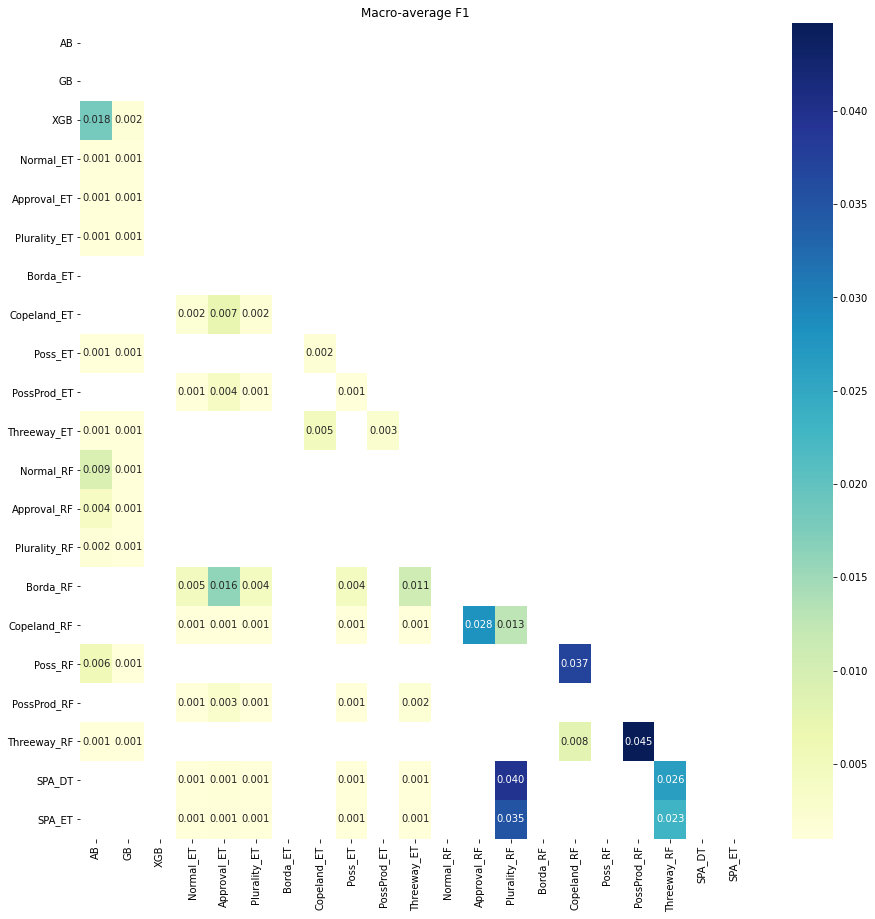

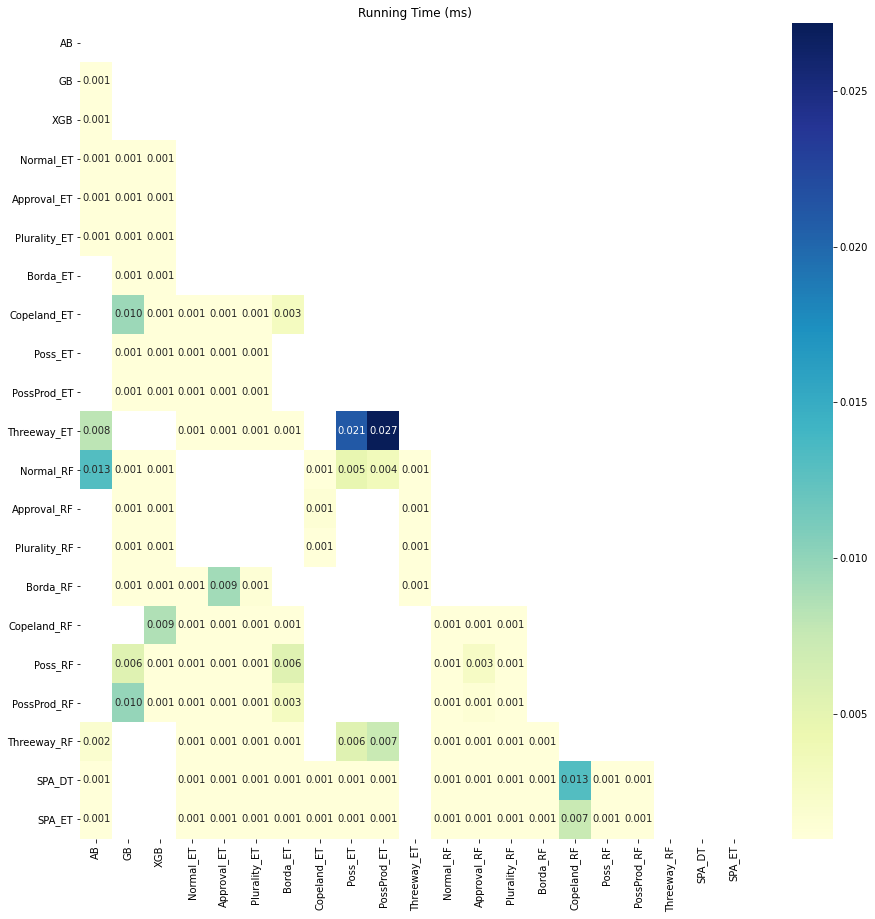

In [185]:
for metric in metrics:
    plt.figure(figsize=(15,15))
    matrix = np.tril(dic_posthoc_pvals[metric])
    ones = np.triu(np.ones(matrix.shape))
    matrix += ones
    matrix = pd.DataFrame(matrix, index=shortened_names, columns = shortened_names)
    mask = matrix > 0.05
    seaborn.heatmap(matrix, 
                    mask=mask,
                    annot=True, fmt=".3f",
                   cmap="YlGnBu")
    plt.title(metric_dict[metric])
    plt.savefig("./Figures/pvalues_" + metric + ".png", dpi=300, bbox_inches='tight')

In [186]:
binary_datasets = df_atts[(df_atts['Classi'] == 2)].index
less_than_10_classes = df_atts[(df_atts['Classi'] > 3) & (df_atts['Classi'] < 10)].index
more_than_10_classes = df_atts[(df_atts['Classi'] >= 10)].index

dfs_by_classes = {"Binary": binary_datasets,
                  "Less than 10 Classes": less_than_10_classes,
                  "More than 10 Classes": more_than_10_classes}

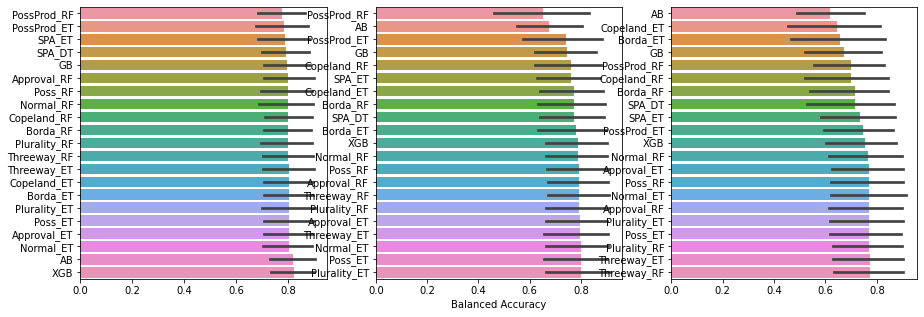

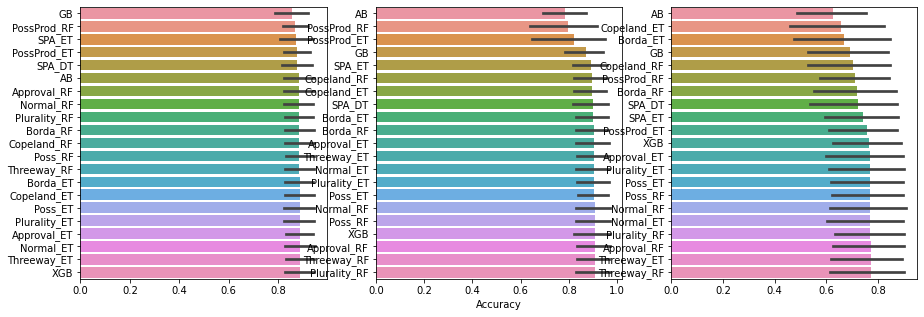

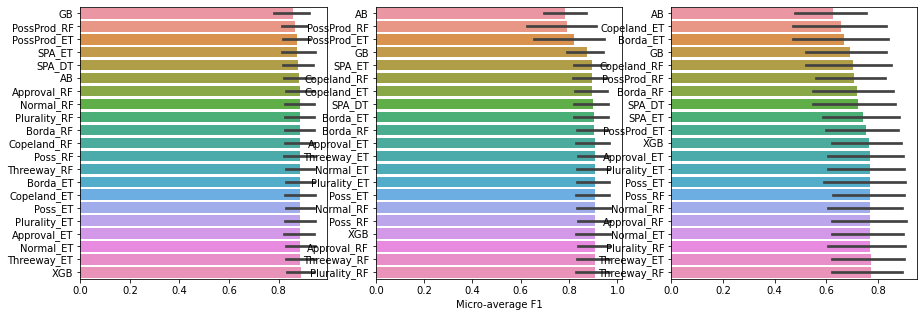

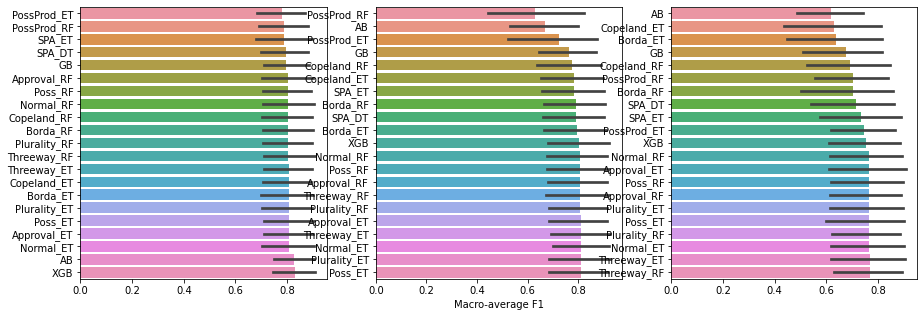

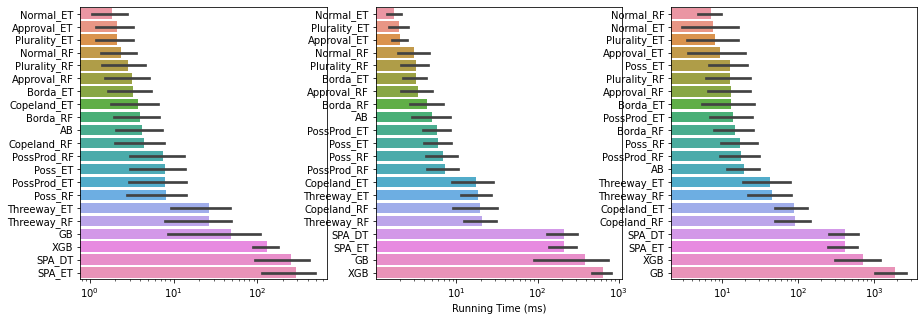

In [188]:
for metric in metrics:
    k = 0
    
    f, axs = plt.subplots(1,3,figsize=(15,5))
    
    for key in dfs_by_classes:
        
        data_temp = pd.DataFrame(dic[metric], index=dic[metric].index, columns = dic[metric].columns)
        data_temp = data_temp.loc[list(dfs_by_classes[key]),:]
        avg_temp = data_temp.mean()
        seaborn.barplot(data=data_temp,
                       orient='h',
                       order=list(avg_temp.sort_values().index), ax=axs[k])
        if k == 1:
            axs[k].set_xlabel(metric_dict[metric])
        if metric == 'time':
            axs[k].set_xscale('log')
        k += 1
        
    plt.savefig('./Figures/classes_ranks_' + metric + ".png", dpi=300, bbox_inches='tight')

,Normal_AdaBoost,Normal_GradientBoosting,Normal_XGBoost,Normal_ExtraTrees,Approval_ExtraTrees,Plurality_ExtraTrees,Borda_ExtraTrees,Copeland_ExtraTrees,Poss_ExtraTrees,PossProd_ExtraTrees,...,Normal_RandomForest,Approval_RandomForest,Plurality_RandomForest,Borda_RandomForest,Copeland_RandomForest,Poss_RandomForest,PossProd_RandomForest,Threeway_RandomForest,SPA_DecisionTree,SPA_ExtraTree
20newsgroups,70.478479,397.158828,2781.973681,54.160919,68.934221,54.166632,89.159155,280.757427,55.587831,70.591197,...,1.920862,68.083024,68.008000,72.675860,322.081379,75.052064,81.049974,223.141002,1281.460348,1263.398936
avila,12.609820,1045.901399,1258.665342,7.537930,9.139790,9.199086,16.454050,241.450821,26.342546,26.785361,...,10.163817,12.461671,10.468003,14.685723,205.209385,24.192297,22.221731,82.025637,938.527520,1018.334911
banknote,1.011295,2.445459,115.304613,0.746005,0.775924,0.762959,0.996311,1.007306,1.623658,1.680505,...,0.930511,0.943477,0.935498,1.176853,1.186826,1.913842,1.828111,5.467377,57.872231,57.900143
cancerwisconsin,1.492469,1.898836,124.684168,1.409783,1.431742,1.529045,1.623276,1.694066,2.388745,2.949702,...,0.909530,2.006055,0.960536,1.933958,2.313868,3.298709,3.282831,6.824309,63.995741,65.648587
car,1.916963,11.200254,767.768435,1.352939,1.591348,1.465110,1.901510,3.574947,3.141282,2.239146,...,1.757339,1.845599,1.710047,2.155852,3.698351,2.728030,2.863021,6.557904,80.085042,77.828346
cargo,3.041388,62.894601,718.256420,3.442490,4.239236,2.918005,4.606368,8.548184,8.396127,6.177792,...,4.159602,4.071827,4.175045,5.605713,8.533570,9.779325,9.831633,27.103172,310.457535,343.962904
credit,1.306256,4.138471,55.701591,0.858852,0.918772,0.890809,1.070569,1.126495,1.641807,1.661779,...,0.918772,0.974698,0.962713,1.114511,1.150462,1.649796,1.771753,5.703930,77.056065,77.173767
crowd,18.777730,1661.643676,688.295827,2.785550,3.542525,3.927591,6.731995,49.827243,15.938372,15.043765,...,9.192416,10.539810,8.626926,13.966646,53.870918,19.525777,20.317659,61.062781,515.426901,496.654078
diabetes,1.121999,2.482361,166.079942,0.809834,0.851722,0.830778,0.962426,0.983370,1.421199,1.458100,...,0.956442,0.983370,0.945471,1.100058,1.111028,1.574788,1.578778,3.842725,39.826483,42.156251
digits,7.355129,505.413224,1298.536222,4.411900,4.967940,4.647275,8.264325,83.717357,7.382256,6.919026,...,3.339539,4.410110,3.595197,6.642191,71.831227,7.162432,7.142458,28.122432,327.275798,319.959090


In [176]:
np.triu(dic_posthoc_pvals[metric])

array([[1.        , 0.001     , 0.001     , 0.001     , 0.001     ,
        0.001     , 0.69561881, 0.9       , 0.9       , 0.9       ,
        0.00797258, 0.01307048, 0.58220575, 0.16253789, 0.9       ,
        0.35814657, 0.9       , 0.9       , 0.00187922, 0.001     ,
        0.001     ],
       [0.        , 1.        , 0.9       , 0.001     , 0.001     ,
        0.001     , 0.001     , 0.00953376, 0.001     , 0.001     ,
        0.9       , 0.001     , 0.001     , 0.001     , 0.001     ,
        0.17047864, 0.00553058, 0.00987384, 0.9       , 0.9       ,
        0.9       ],
       [0.        , 0.        , 1.        , 0.001     , 0.001     ,
        0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
        0.37176223, 0.001     , 0.001     , 0.001     , 0.001     ,
        0.00856705, 0.001     , 0.001     , 0.61205091, 0.9       ,
        0.9       ],
       [0.        , 0.        , 0.        , 1.        , 0.9       ,
        0.9       , 0.09827352, 0.001     , 0.001    